In [1]:
#importing pandas_data_reader to download data from yahoo finance
import pandas as pd
import pandas_datareader as pdr


In [2]:
df=pd.read_csv(r"C:\Users\Asus\Documents\Stock-MArket-Forecasting\AAPL.csv")

In [3]:
df

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.0500,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.1000,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.9000,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.0500,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.3200,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.960,316.500,310.3241,313.17,33843125,314.960000,316.500000,310.324100,313.170000,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.140,318.520,313.0100,315.03,25432385,313.140000,318.520000,313.010000,315.030000,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.230,319.520,316.2000,316.68,27876215,319.230000,319.520000,316.200000,316.680000,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.850,320.890,315.8700,318.66,25672211,316.850000,320.890000,315.870000,318.660000,25672211,0.0,1.0


In [4]:
import numpy as np
df1=df.reset_index()['close']

In [5]:
df1=np.array(df1).reshape(-1,1)

In [6]:
# scaling the data not necessary for multiple perceptron
# "#from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler(feature_range=(0,1))
# #reshape (-1,1)convert the given matrix into that many rows and 1 columns e.g 100 item convert into 100*1 2-d array
# df1=scaler.fit_transform(np.array(df1).reshape(-1,1))"

In [7]:
#splitting the dataset for training and test set preparation
training_size=int(len(df)*.65)
test_size=len(df)-training_size
training_size,test_size,len(df)

(817, 441, 1258)

In [8]:
df1.shape

(1258, 1)

In [9]:
df1[:,:]

array([[132.045],
       [131.78 ],
       [130.28 ],
       ...,
       [319.23 ],
       [316.85 ],
       [318.89 ]])

In [10]:
#first .65 percent for training and remaining for test set preparation
stock_train=df1[:training_size,:]
stock_test=df1[training_size:len(df1),:]

In [11]:
stock_test.shape,stock_train.shape

((441, 1), (817, 1))

In [12]:
#preparing the training and test set as we want 100 previous day data to predict the next day
class stock:
    def __init__(self,stock):
        self.stock_train=stock


    def gen_train(self,seq_len):
        self.input_train=[]
        self.output_train=[]
        for i in range((len(self.stock_train))-seq_len-1):
            x=np.array(self.stock_train[i:i+seq_len,0])
            y=np.array(self.stock_train[i+seq_len+1,0],np.float64)
            self.input_train.append(x)
            self.output_train.append(y)
        

        return np.array(self.input_train),np.array(self.output_train)
    
    


In [13]:
#getting the training and test data 
Stock_train=stock(stock_train)
X_train,Y_train=Stock_train.gen_train(100)

In [14]:
Stock_test=stock(stock_test)
X_test,Y_test=Stock_test.gen_train(100)

In [15]:
X_test.shape,X_train.shape

((340, 100), (716, 100))

In [16]:
X_train

array([[132.045, 131.78 , 130.28 , ..., 111.79 , 110.21 , 111.86 ],
       [131.78 , 130.28 , 130.535, ..., 110.21 , 111.86 , 111.04 ],
       [130.28 , 130.535, 129.96 , ..., 111.86 , 111.04 , 111.73 ],
       ...,
       [172.77 , 168.34 , 166.48 , ..., 208.87 , 209.75 , 210.24 ],
       [168.34 , 166.48 , 167.78 , ..., 209.75 , 210.24 , 213.32 ],
       [166.48 , 167.78 , 166.68 , ..., 210.24 , 213.32 , 217.58 ]])

In [17]:
stock_train

array([[132.045],
       [131.78 ],
       [130.28 ],
       [130.535],
       [129.96 ],
       [130.12 ],
       [129.36 ],
       [128.65 ],
       [127.8  ],
       [127.42 ],
       [128.88 ],
       [128.59 ],
       [127.17 ],
       [126.92 ],
       [127.6  ],
       [127.3  ],
       [127.88 ],
       [126.6  ],
       [127.61 ],
       [127.03 ],
       [128.11 ],
       [127.5  ],
       [126.75 ],
       [124.53 ],
       [125.425],
       [126.6  ],
       [126.44 ],
       [126.   ],
       [125.69 ],
       [122.57 ],
       [120.07 ],
       [123.28 ],
       [125.66 ],
       [125.61 ],
       [126.82 ],
       [128.51 ],
       [129.62 ],
       [132.07 ],
       [130.75 ],
       [125.22 ],
       [125.16 ],
       [124.5  ],
       [122.77 ],
       [123.38 ],
       [122.99 ],
       [122.37 ],
       [121.3  ],
       [118.44 ],
       [114.64 ],
       [115.4  ],
       [115.13 ],
       [115.52 ],
       [119.72 ],
       [113.49 ],
       [115.24 ],
       [11

In [18]:
X_train[-1,:]

array([166.48, 167.78, 166.68, 168.39, 171.61, 172.8 , 168.38, 170.05,
       173.25, 172.44, 174.14, 174.73, 175.82, 178.24, 177.84, 172.8 ,
       165.72, 165.24, 162.94, 163.65, 164.22, 162.32, 165.26, 169.1 ,
       176.57, 176.89, 183.83, 185.16, 186.05, 187.36, 190.04, 188.59,
       188.15, 186.44, 188.18, 186.99, 186.31, 187.63, 187.16, 188.36,
       188.15, 188.58, 187.9 , 187.5 , 186.87, 190.24, 191.83, 193.31,
       193.98, 193.46, 191.7 , 191.23, 192.28, 190.7 , 190.8 , 188.84,
       188.74, 185.69, 186.5 , 185.46, 184.92, 182.17, 184.43, 184.16,
       185.5 , 185.11, 187.18, 183.92, 185.4 , 187.97, 190.58, 190.35,
       187.88, 191.03, 191.33, 190.91, 191.45, 190.4 , 191.88, 191.44,
       191.61, 193.  , 194.82, 194.21, 190.98, 189.91, 190.29, 201.5 ,
       207.39, 207.99, 209.07, 207.11, 207.25, 208.88, 207.53, 208.87,
       209.75, 210.24, 213.32, 217.58])

In [19]:
#importing the tensorflow and necesssary for implementation
import tensorflow as tf

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [21]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='relu'))
model.compile(optimizer="adam", loss="mean_squared_error",metrics = ['accuracy'])


In [22]:
#fitting the training set and training actual value for the perceptron method to fit
model.fit(X_train, Y_train,batch_size=32,epochs=40)

Train on 716 samples
Epoch 1/40
716/716 [==============================] - 1s 1ms/sample - loss: 893.0424 - accuracy: 0.0000e+00
Epoch 2/40
716/716 [==============================] - 0s 91us/sample - loss: 122.2719 - accuracy: 0.0000e+00
Epoch 3/40
716/716 [==============================] - 0s 94us/sample - loss: 73.9023 - accuracy: 0.0000e+00
Epoch 4/40
716/716 [==============================] - 0s 87us/sample - loss: 72.2151 - accuracy: 0.0000e+00
Epoch 5/40
716/716 [==============================] - 0s 91us/sample - loss: 60.8483 - accuracy: 0.0000e+00
Epoch 6/40
716/716 [==============================] - 0s 99us/sample - loss: 67.6487 - accuracy: 0.0000e+00
Epoch 7/40
716/716 [==============================] - 0s 80us/sample - loss: 49.5430 - accuracy: 0.0000e+00
Epoch 8/40
716/716 [==============================] - 0s 91us/sample - loss: 44.8483 - accuracy: 0.0000e+00
Epoch 9/40
716/716 [==============================] - 0s 94us/sample - loss: 42.2086 - accuracy: 0.0000e+00
Epoch 

In [23]:
model.evaluate(X_test, Y_test)

340/340 [==============================] - 0s 855us/sample - loss: 108.1425 - accuracy: 0.0000e+00


[108.14253979851217, 0.0]

In [24]:
#prediction made by our model
test_predict=model.predict(X_test)

In [25]:
train_predict=model.predict(X_train)

In [26]:
train_predict.shape

(716, 1)

In [27]:
#plotting our result
import pandas as pd
import matplotlib.pyplot as plt
# plt.plot(scaler.inverse_transform(df1))


In [28]:
train_predict

array([[112.45251 ],
       [113.36431 ],
       [112.855225],
       [113.7972  ],
       [111.85896 ],
       [111.610855],
       [115.5635  ],
       [116.83021 ],
       [117.16813 ],
       [116.29948 ],
       [116.825356],
       [116.81913 ],
       [118.344215],
       [118.64161 ],
       [119.77709 ],
       [121.90665 ],
       [122.1586  ],
       [122.2499  ],
       [120.0335  ],
       [120.32217 ],
       [121.22411 ],
       [120.25022 ],
       [119.280525],
       [117.8551  ],
       [117.73182 ],
       [116.00131 ],
       [117.46395 ],
       [119.479195],
       [119.64802 ],
       [119.48757 ],
       [121.08364 ],
       [119.444466],
       [119.459984],
       [117.662994],
       [118.03045 ],
       [117.590004],
       [117.88409 ],
       [117.976135],
       [119.52103 ],
       [119.75453 ],
       [118.15168 ],
       [117.965096],
       [114.22282 ],
       [113.010185],
       [111.72706 ],
       [110.85342 ],
       [111.26707 ],
       [110.6

In [29]:
# train_predict=scaler.inverse_transform(train_predict)
# test_predict=scaler.inverse_transform(test_predict)
# df1=scaler.inverse_transform(df1)

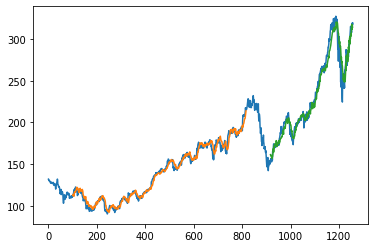

In [30]:
#the orange line shows our prediction on training data while the greenline shows our prediction on the testset
#the blue line is the actual closing price for the data
import numpy as np
seq_len=100

Y_train_plot=np.empty_like(df1)
Y_train_plot[:,:]=np.nan
Y_train_plot[seq_len+1:len(X_train)+seq_len+1,:]=train_predict
#similarily for test
Y_test_plot=np.empty_like(df1)
Y_test_plot[:,:]=np.nan
Y_test_plot[len(X_train)+2*seq_len+1:len(df1)-1,:]=test_predict

plt.plot(df1)
plt.plot(Y_train_plot)
plt.plot(Y_test_plot)
